In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.image as mpimage
import matplotlib.pyplot as plt

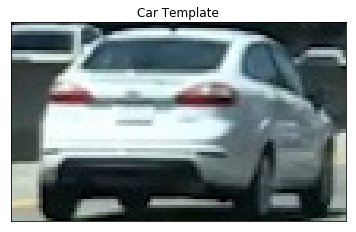

In [3]:
image = mpimage.imread('../Images/car_cutout_1.jpg')

plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.title('Car Template')
plt.show()

In [4]:
def get_histogram(channel, bins = 32, _range = (0, 256)):
    histogram = np.histogram(channel, bins = bins, range = _range)
    bin_edges = histogram[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0 : len(bin_edges) - 1]) / 2
    return histogram, bin_edges, bin_centers

In [5]:
red_histogram, red_bin_edges, red_bin_centers = get_histogram(image[:, :, 0])
blue_histogram, blue_bin_edges, blue_bin_centers = get_histogram(image[:, :, 1])
green_histogram, green_bin_edges, green_bin_centers = get_histogram(image[:, :, 2])

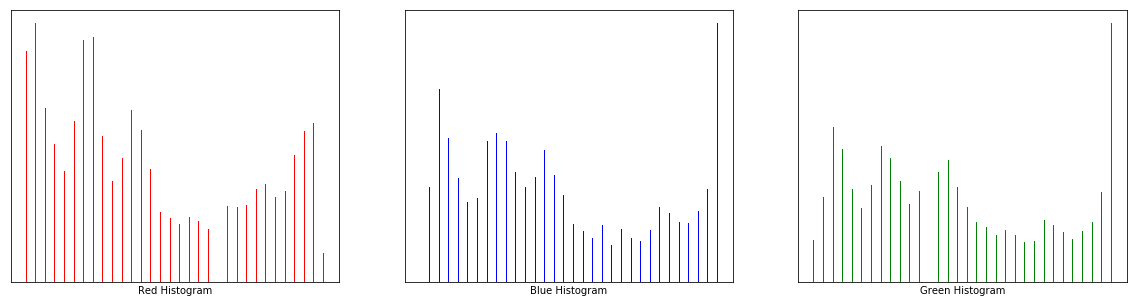

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
plt.setp(axes.flat, xticks = [], yticks = [])
c = 0
for i, ax in enumerate(axes.flat):
    if i % 3 == 0:
        ax.bar(red_bin_centers, red_histogram[0], color = 'red')
        ax.set_xlabel('Red Histogram')
    if i % 3 == 1:
        ax.bar(blue_bin_centers, blue_histogram[0], color = 'blue')
        ax.set_xlabel('Blue Histogram')
    if i % 3 == 2:
        ax.bar(green_bin_centers, green_histogram[0], color = 'green')
        ax.set_xlabel('Green Histogram')
        c += 1
plt.show()

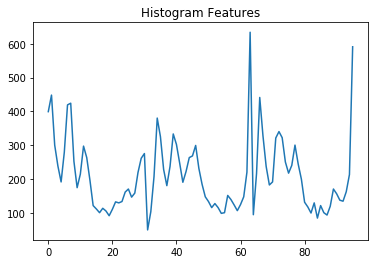

In [7]:
histogram_features = np.concatenate((red_histogram[0], green_histogram[0], blue_histogram[0]))

plt.plot(histogram_features)
plt.title('Histogram Features')
plt.show()